# Метод середины квадрата

In [ ]:
import random
number = 8
print(f'Произвольное число: {number}')
squared_number = number ** 2
print(f'Число в квадрате: {number ** 2}')
squared_number_string = str(squared_number)
squared_number_string = ('0' * (2 * len(str(number)) - len(squared_number_string))) + squared_number_string
print(f'Число в квадрате с добавлением нулей: {squared_number_string}')
number_length = len(str(number))
new_number = int(squared_number_string[len(squared_number_string) // 2 - ((number_length + 1) // 2):len(squared_number_string) // 2 + ((number_length + 1) // 2)])

#new_number = int(squared_number_string[(len(squared_number_string) // 2):((len(squared_number_string) // 4) + (len(squared_number_string) // 2))])
print(f'Новое число: {new_number}')

Произвольное число: 8
Число в квадрате: 64
Число в квадрате с добавлением нулей: 64
Новое число: 64


In [ ]:
def next_number_middle_square(number):
  squared_number = number ** 2
  squared_number_string = str(squared_number)
  squared_number_string = ('0' * (2 * len(str(number)) - len(squared_number_string))) + squared_number_string
  number_length = len(str(number))
  new_number = int(squared_number_string[len(squared_number_string) // 2 - ((number_length + 1) // 2):len(squared_number_string) // 2 + ((number_length + 1) // 2)])
  return new_number
  

In [ ]:
def generate_sequence_middle_square(number, length):
  if length == 0:
    return []
  A = [number]
  for i in range(1, length):
    A.append(next_number_middle_square(A[-1]))
  return A

In [ ]:
from math import log10, ceil
import numpy as np
def build_z(A):
  maxx = max(A)
  k = ceil(log10(maxx))
  z = np.array(A, dtype=np.float64)
  z /= 10 ** k
  return z
  

# Мультипликативный конгруэнтный метод

In [ ]:
A = [1]
k = 7
m = 13
for i in range(m*2):
  e = (A[-1] * k) % m
  A.append(e)
z = [i/m for i in A]
print(A)
print(z)

[1, 7, 10, 5, 9, 11, 12, 6, 3, 8, 4, 2, 1, 7, 10, 5, 9, 11, 12, 6, 3, 8, 4, 2, 1, 7, 10]
[0.07692307692307693, 0.5384615384615384, 0.7692307692307693, 0.38461538461538464, 0.6923076923076923, 0.8461538461538461, 0.9230769230769231, 0.46153846153846156, 0.23076923076923078, 0.6153846153846154, 0.3076923076923077, 0.15384615384615385, 0.07692307692307693, 0.5384615384615384, 0.7692307692307693, 0.38461538461538464, 0.6923076923076923, 0.8461538461538461, 0.9230769230769231, 0.46153846153846156, 0.23076923076923078, 0.6153846153846154, 0.3076923076923077, 0.15384615384615385, 0.07692307692307693, 0.5384615384615384, 0.7692307692307693]


In [ ]:
def generate_sequence_kong(k, M, length):
  if length == 0:
    return []

  A = [1]
  for i in range(1, length):
    A.append((A[-1]* k) % M)
   
  z = [i/M for i in A]
  return z


# Тестирование равномерности метода средних квадратов n = 100

[1000000007, 140000, 600000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10 10


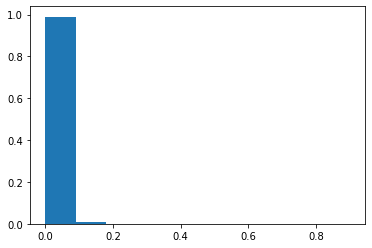

M = 0.001000740007
D = 9.899855879838959e-05


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
K = 10
L, R = [0], []
for _ in range(K):
  R.append(L[-1] + 1 / K)
  L.append(R[-1])
L.pop()
A = generate_sequence_middle_square(10 ** 9 + 7, 100)
print(A)
z = build_z(A)
count = [0 for _ in range(K)]

for i in z:
  for j in range(K):
    if (i >= L[j] and i < R[j]):
      count[j] += 1
      break
p = np.array(count, dtype=np.float64) / len(A)
print(len(L), len(p))

plt.hist(np.array(L), weights=p, bins = K)
plt.show()

mean = np.mean(np.array(z))
print('M =', mean)
print('D =', np.var(np.array(z)))



# Тестирование равномерности метода средних квадратов n == 10000

[5, 6, 2491, 7, 2490, 10, 2488, 6, 2492, 5] 9772


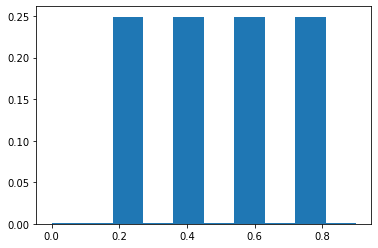

M = 0.510027
D = 0.05018112194100002


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

K = 10
L, R = [0], []
for _ in range(K):
  R.append(L[-1] + 1 / K)
  L.append(R[-1])
L.pop()
A = generate_sequence_middle_square(4571, 10000)

z = build_z(A)
count = [0 for _ in range(K)]

for i in z:
  for j in range(K):
    if (i >= L[j] and i < R[j]):
      count[j] += 1
      break
print(count, max(A))
p = np.array(count, dtype=np.float64) / len(z)

plt.hist(np.array(L), weights=p, bins = K)
plt.show()

mean = np.mean(np.array(z))
print('M =', mean)
print('D =', np.var(np.array(z)))

# Тестирование равномерности Мультипликативного конгруэнтного метода n = 100

[9.999000099990002e-05, 0.0066993300669933005, 0.44885511448855114, 0.07329267073292671, 0.9106089391060894, 0.010798920107989201, 0.7235276472352765, 0.47635236476352366, 0.9156084391560844, 0.3457654234576542, 0.16628337166283372, 0.140985901409859, 0.4460553944605539, 0.8857114288571143, 0.34266573342665735, 0.9586041395860414, 0.22647735226477353, 0.17398260173982602, 0.6568343165683431, 0.007899210078992101, 0.5292470752924707, 0.45955404459554045, 0.7901209879012099, 0.9381061893810619, 0.8531146885311469, 0.1586841315868413, 0.6318368163183682, 0.3330666933306669, 0.3154684531546845, 0.13638636136386362, 0.13788621137886212, 0.23837616238376164, 0.9712028797120288, 0.0705929407059294, 0.7297270272972702, 0.8917108289171083, 0.7446255374462554, 0.8899110088991101, 0.6240375962403759, 0.8105189481051894, 0.3047695230476952, 0.41955804419558046, 0.11038896110388961, 0.39606039396060394, 0.536046395360464, 0.9151084891510849, 0.31226877312268775, 0.922007799220078, 0.774522547745225

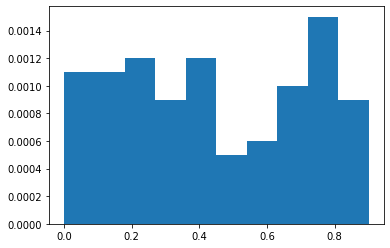

M = 0.49048795120487954
D = 0.09010379107174775


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
K = 10
L, R = [0], []
for _ in range(K):
  R.append(L[-1] + 1 / K)
  L.append(R[-1])
L.pop()
#A = generate_sequence_middle_square(9874, 100)
z = generate_sequence_kong(67, 10001, 100)
print(z)
count = [0 for _ in range(K)]

for i in z:
  for j in range(K):
    if (i >= L[j] and i < R[j]):
      count[j] += 1
      break
p = np.array(count, dtype=np.float64) / len(A)
plt.hist(np.array(L), weights=p, bins = K)
plt.show()

mean = np.mean(np.array(z))
print('M =', mean)
print('D =', np.var(np.array(z)))

# Тестирование равномерности Мультипликативного конгруэнтного метода n = 10000

[9.999000099990002e-05, 0.0066993300669933005, 0.44885511448855114, 0.07329267073292671, 0.9106089391060894, 0.010798920107989201, 0.7235276472352765, 0.47635236476352366, 0.9156084391560844, 0.3457654234576542, 0.16628337166283372, 0.140985901409859, 0.4460553944605539, 0.8857114288571143, 0.34266573342665735, 0.9586041395860414, 0.22647735226477353, 0.17398260173982602, 0.6568343165683431, 0.007899210078992101, 0.5292470752924707, 0.45955404459554045, 0.7901209879012099, 0.9381061893810619, 0.8531146885311469, 0.1586841315868413, 0.6318368163183682, 0.3330666933306669, 0.3154684531546845, 0.13638636136386362, 0.13788621137886212, 0.23837616238376164, 0.9712028797120288, 0.0705929407059294, 0.7297270272972702, 0.8917108289171083, 0.7446255374462554, 0.8899110088991101, 0.6240375962403759, 0.8105189481051894, 0.3047695230476952, 0.41955804419558046, 0.11038896110388961, 0.39606039396060394, 0.536046395360464, 0.9151084891510849, 0.31226877312268775, 0.922007799220078, 0.774522547745225

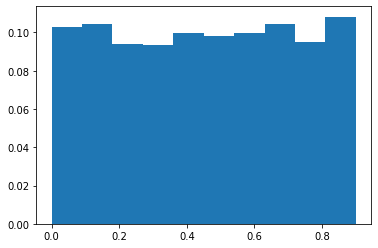

M = 0.5022588941105889
D = 0.08589938079367306


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
K = 10
L, R = [0], []
for _ in range(K):
  R.append(L[-1] + 1 / K)
  L.append(R[-1])
L.pop()
#A = generate_sequence_middle_square(9874, 100)
z = generate_sequence_kong(67, 10001, 10000)
print(z)
count = [0 for _ in range(K)]

for i in z:
  for j in range(K):
    if (i >= L[j] and i < R[j]):
      count[j] += 1
      break
p = np.array(count, dtype=np.float64) / len(z)

plt.hist(np.array(L), weights=p, bins = K)
plt.show()

mean = np.mean(np.array(z))
print('M =', mean)
print('D =', np.var(np.array(z)))

# Тестирование независимости метода средних квадратов

In [ ]:
def indepence(A):
  s = 3
  A1 = A[:-s]
  A2 = A[s:]
  n = len(A)
  #R = (12 / (len(A) - s) * np.sum(np.array(A1) * np.array(A2)) - 3)
  EE = (np.mean(np.array(A1) * np.array(A2)) - (np.mean(np.array(A1)) * np.mean(np.array(A2)))) / ((np.var(A1) * np.var(A2)) ** 0.5)
  return EE
  
  


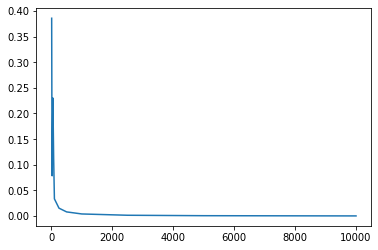

In [ ]:
import matplotlib.pyplot as plt
nn = [10, 20, 25, 50, 75, 100, 250, 500, 1000, 2500, 5000, 10000]
ans=[]
for n in nn:
  A = generate_sequence_middle_square(4571, n)
  z = build_z(A)
  ans.append(abs(indepence(z)))
plt.plot(nn, ans)
plt.show()



# Тестирование независимости Мультипликативного конгруэнтного метода

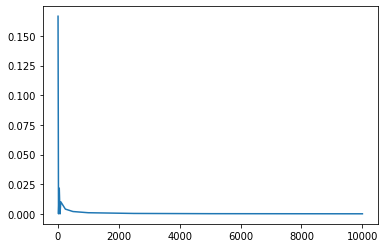

In [ ]:
import matplotlib.pyplot as plt
nn = [10, 20, 25, 50, 75, 100, 250, 500, 1000, 2500, 5000, 10000]
ans=[]
for n in nn:
  z = generate_sequence_kong(100, 10001, n)
  
  ans.append(abs(indepence(z)))
plt.plot(nn, ans)
plt.show()

